## The Well Dataloading Example

[link to official documentation](https://polymathic-ai.org/the_well/tutorials/dataset/)  
[link to original paper](https://proceedings.neurips.cc/paper_files/paper/2024/file/4f9a5acd91ac76569f2fe291b1f4772b-Paper-Datasets_and_Benchmarks_Track.pdf)

## Imports

In [1]:

import pprint as pp
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import torch
from einops import rearrange
from tqdm import tqdm

from the_well.benchmark.metrics import VRMSE
from the_well.data import WellDataset
from the_well.utils.download import well_download
from the_well.data import WellDataset
from torch.utils.data import DataLoader

%load_ext autoreload
%autoreload 2
%matplotlib inline


## Load Data

In [2]:

# Load data from online, when using in practice we'll have to download the dataset
dataset = WellDataset(
    well_base_path=Path('/data') / 'alexey' / 'the_well',
    well_dataset_name='active_matter',
    well_split_name="train",
    n_steps_input=10,
    n_steps_output=1,
    use_normalization=True,
)
dataloader = DataLoader(dataset)



## Poking Around

In [3]:

print("Length of dataset:")
print(len(dataset))
print()
print("Items in each data point:")
pp.pprint(list(dataset[0].keys()))
print()
print("input_fields shape:")
print(dataset[0]['input_fields'].shape)
print()
print("output_fields shape:")
print(dataset[0]['output_fields'].shape)
print()
print("metadata:")
pp.pprint(dataset.metadata)


Length of dataset:
12425

Items in each data point:
['input_fields',
 'output_fields',
 'constant_scalars',
 'boundary_conditions',
 'space_grid',
 'input_time_grid',
 'output_time_grid']

input_fields shape:
torch.Size([10, 256, 256, 11])

output_fields shape:
torch.Size([1, 256, 256, 11])

metadata:
WellMetadata(dataset_name='active_matter',
             n_spatial_dims=2,
             spatial_resolution=(256, 256),
             scalar_names=[],
             constant_scalar_names=['L', 'zeta', 'alpha'],
             field_names={0: ['concentration'],
                          1: ['velocity_x', 'velocity_y'],
                          2: ['D_xx',
                              'D_xy',
                              'D_yx',
                              'D_yy',
                              'E_xx',
                              'E_xy',
                              'E_yx',
                              'E_yy']},
             constant_field_names={0: [], 1: [], 2: []},
             boundar

In [5]:

data_point = dataset[42]
print(data_point["input_fields"].shape)
print(data_point["output_fields"].shape)
print(data_point.keys())


torch.Size([10, 256, 256, 11])
torch.Size([1, 256, 256, 11])
dict_keys(['input_fields', 'output_fields', 'constant_scalars', 'boundary_conditions', 'space_grid', 'input_time_grid', 'output_time_grid'])


## Visualizing Data

torch.Size([11, 10, 256, 256])


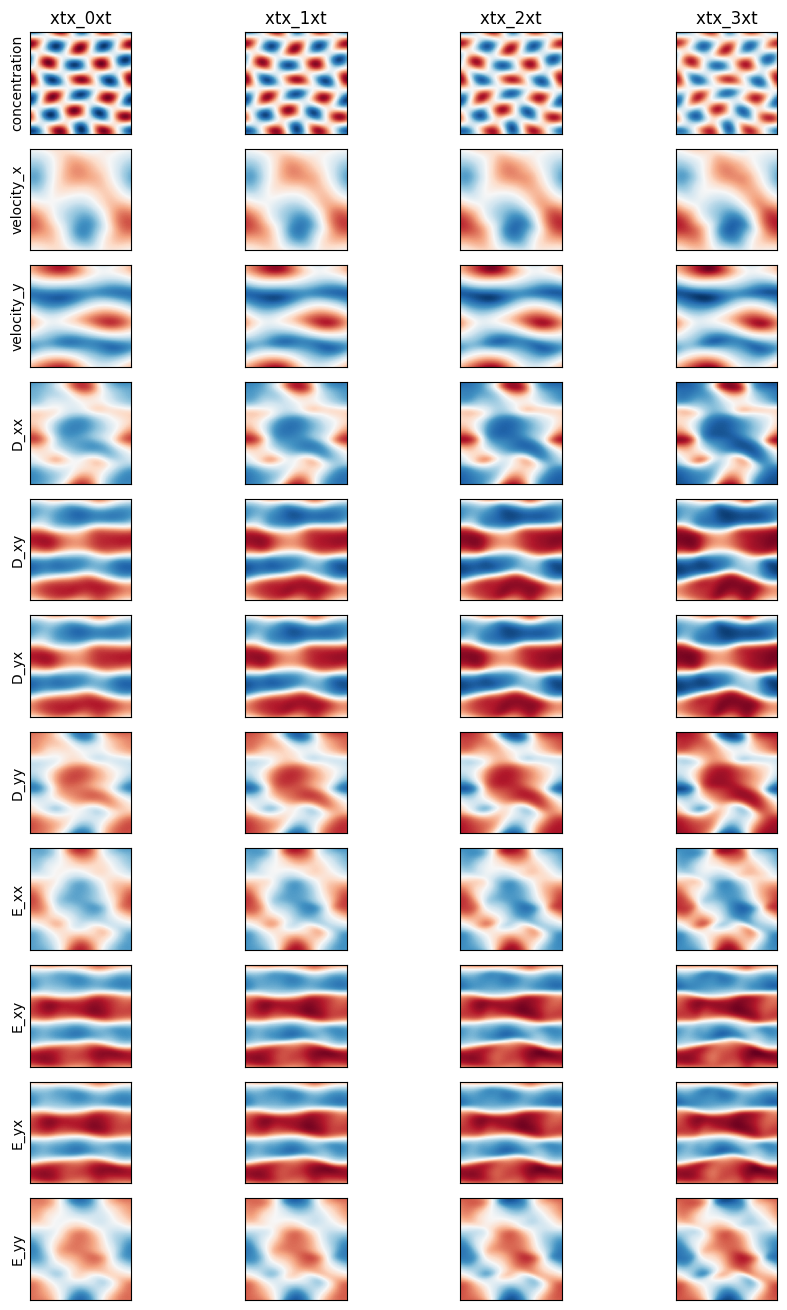

In [8]:
F = dataset.metadata.n_fields
field_names = [
    name for group in dataset.metadata.field_names.values() for name in group
]
field_names

x = dataset[42]["input_fields"]
x = rearrange(x, "T Lx Ly F -> F T Lx Ly")
print(x.shape)

fig, axs = plt.subplots(F, 4, figsize=(4 * 2.4, F * 1.2))

for field in range(F):
    vmin = np.nanmin(x[field])
    vmax = np.nanmax(x[field])

    axs[field, 0].set_ylabel(f"{field_names[field]}")

    for t in range(4):
        axs[field, t].imshow(
            x[field, t], cmap="RdBu_r", interpolation="none", vmin=vmin, vmax=vmax
        )
        axs[field, t].set_xticks([])
        axs[field, t].set_yticks([])

        axs[0, t].set_title(f"xtx_{t}xt​")

plt.tight_layout()

